<div >
<img src = "https://raw.githubusercontent.com/jddiaze/AprendizajeNoSupervisado/main/Semana1/Files/figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía


Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [1]:
!pip install pca


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pca import pca

In [30]:
# Utilice este espacio para escribir el código.
df = pd.read_csv("https://raw.githubusercontent.com/jddiaze/AprendizajeNoSupervisado/main/Semana1/Files/data/lugares.csv")
df = df.set_index("Ciudad")
df.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


### 2.  Análisis descriptivo de las variables.

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables.

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.

Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

In [31]:
# Utilice este espacio para escribir el código.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clima y Terreno,329.0,538.732523,120.808259,105.0,480.0,542.0,592.0,910.0
Alojamiento,329.0,8346.559271,2385.262622,5159.0,6760.0,7877.0,9015.0,23640.0
Cuidado de la salud y el medio ambiente,329.0,1185.738602,1003.002036,43.0,583.0,833.0,1445.0,7850.0
Crimen,329.0,961.054711,357.154186,308.0,707.0,947.0,1156.0,2498.0
Transporte,329.0,4210.082067,1451.179240,1145.0,3141.0,4080.0,5205.0,8625.0
Educación,329.0,2814.887538,320.792953,1701.0,2619.0,2794.0,3012.0,3781.0
Artes,329.0,3150.884498,4642.283738,52.0,778.0,1871.0,3844.0,56745.0
Recreación,329.0,1845.957447,807.888171,300.0,1316.0,1670.0,2176.0,4800.0
Economía,329.0,5525.364742,1084.468523,3045.0,4842.0,5384.0,6113.0,9980.0


In [32]:
correlation_matrix = df.corr()
correlation_matrix

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Clima y Terreno,1.000000,0.386291,0.213303,0.192387,0.079120,0.064520,0.226974,0.213509,-0.100083
Alojamiento,0.386291,1.000000,0.453010,0.134222,0.271922,0.197934,0.448568,0.422288,0.269433
Cuidado de la salud y el medio ambiente,0.213303,0.453010,1.000000,0.304659,0.470317,0.490234,0.865796,0.325397,0.069271
Crimen,0.192387,0.134222,0.304659,1.000000,0.286578,0.074416,0.389483,0.344627,0.259995
Transporte,0.079120,0.271922,0.470317,0.286578,1.000000,0.335992,0.464806,0.364716,0.059247
Educación,0.064520,0.197934,0.490234,0.074416,0.335992,1.000000,0.373279,0.077807,0.119700
Artes,0.226974,0.448568,0.865796,0.389483,0.464806,0.373279,1.000000,0.378659,0.075673
Recreación,0.213509,0.422288,0.325397,0.344627,0.364716,0.077807,0.378659,1.000000,0.173531
Economía,-0.100083,0.269433,0.069271,0.259995,0.059247,0.119700,0.075673,0.173531,1.000000


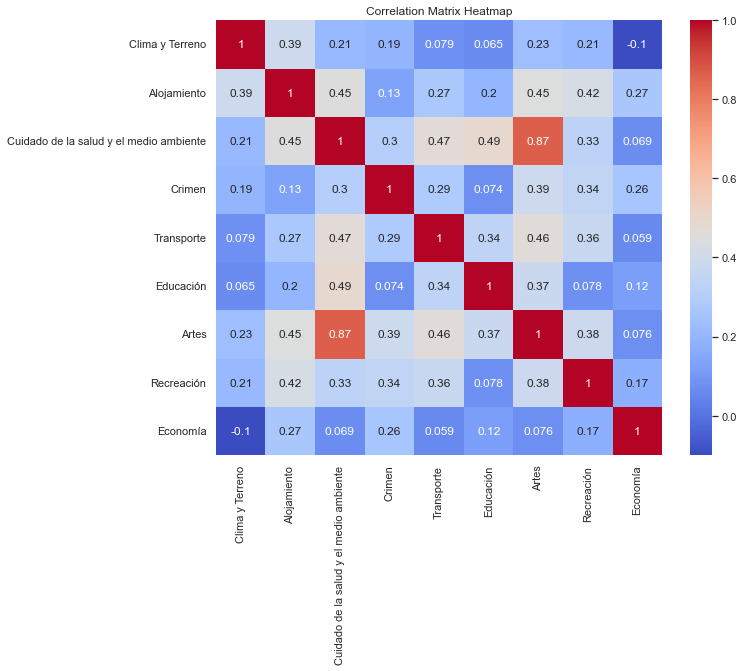

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
k = len(df.columns)
combinaciones = np.math.comb(k, 2)
combinaciones

36

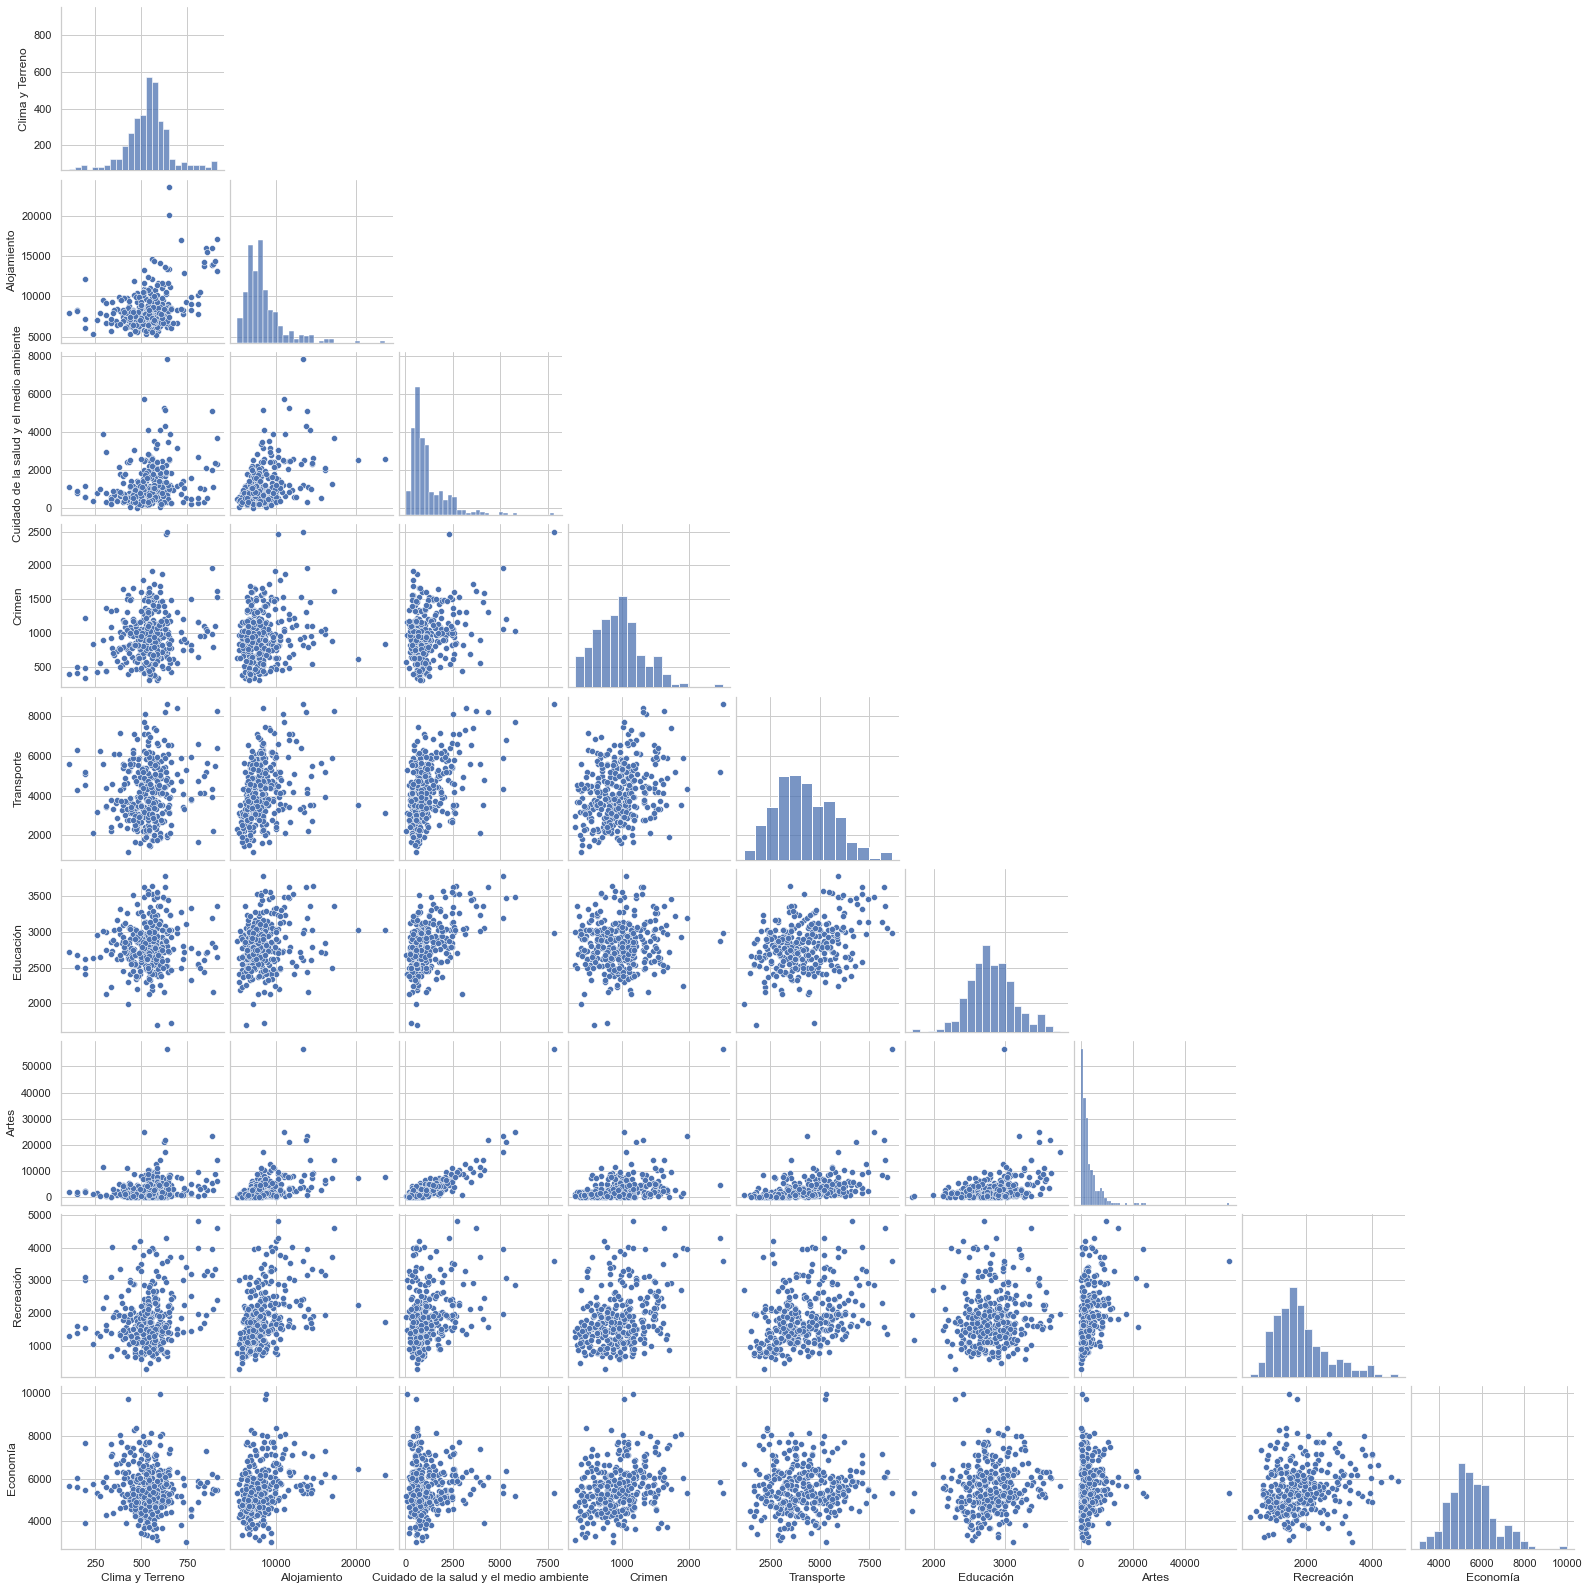

In [35]:
g = sns.pairplot(df)
for i, j in zip(*plt.np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

**Procedimiento**
1. Se usa `describe` para obtener un resumen de las estadísticas. Luego se aplica `T` para transponer las estadísticas y tener una mejor lectura.
2. Se usa `corr` para calcular la matriz de correlación. Esta correlación se guarda en una variable `correlation_matrix`
3. A través de la librería `seaborn` se grafica un heatmap para identificar visualmente las correlaciones.
4. Usando `np.math.comb` podemos conocer el número de gráficos de dispersión bivariados.
5. Se usa `seaborn` para graficar los diagramas de dispersión mostrando únicamente el triángulo inferior.

**Análisis**
1. Se necesitan un total de `36` gráficos de dispersión bivariados.
2. `Artes` y `Cuidado de la salud y el medio ambiente` tienen una correlación de `0.87`.
3. `Economía` y `Clima y Terreno` tienen una correlación de `-0.1`.

**Importancia de los Análisis Descriptivos**

El analisis descriptivo de los datos para el desarrollo del PCA es importante porque permite comprender las características básicas de los mismos y como estás pueden afectar los resultados de análisis posteriores. Esto incluye entender la variación y distribución de los datos, la presencia de valores atípicos, entre otros. El Análisis Descriptivo nos permite por lo tanto:
1. Conocer las características básicas de los datos, como su distribución y tendencias.
2. Ayuda a detectar valores atípicos y datos faltantes que pueden afectar los análisis de PCA.
3. Ayuda a decidir qué variables son relevantes para PCA, optimizando la reducción de dimensionalidad.
4. A través de estos analisis se pueden identificar que variables requieren transformaciones antes de proceder para el desarrollo de PCA.

**Conclusiones**
1. `Artes` y `Cuidado de la salud y el medio ambiente` están altamente correlacionados.
2. `Economía` está negativamente correlacionado con `Clima y Terreno`.
3. El `Crímen` esta positivamente correlacionado con la `Educación` y las `Artes`. Esta constatación aparentemente contraviene las expectativas convencionales que sugieren una asociación inversa entre niveles superiores de educación y tasas de criminalidad.
4. El `Alojamiento` esta positivamente correlacionado con el `Cuidado de la salud y el medio ambiente` y las `Artes`. Este fenómeno podría ocurrir debido al hecho de que áreas con un mayor alojamiento se podría tener una infraestructura y población más densa, lo que aumenta la demanda de servicios de cuidado de la salud y fomenta la presencia de actividades culturales y artisticas.

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso.

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

In [36]:
## Tomando en cuenta lo que se menciono sobre Crimen y Alojamiento en el punto dos se procede a modificar las variables multiplicandolas por -1 para reflejar su efecto
df['Crimen'] = df['Crimen'] * -1
df['Alojamiento'] = df['Alojamiento'] * -1

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clima y Terreno,329.0,538.732523,120.808259,105.0,480.0,542.0,592.0,910.0
Alojamiento,329.0,-8346.559271,2385.262622,-23640.0,-9015.0,-7877.0,-6760.0,-5159.0
Cuidado de la salud y el medio ambiente,329.0,1185.738602,1003.002036,43.0,583.0,833.0,1445.0,7850.0
Crimen,329.0,-961.054711,357.154186,-2498.0,-1156.0,-947.0,-707.0,-308.0
Transporte,329.0,4210.082067,1451.179240,1145.0,3141.0,4080.0,5205.0,8625.0
Educación,329.0,2814.887538,320.792953,1701.0,2619.0,2794.0,3012.0,3781.0
Artes,329.0,3150.884498,4642.283738,52.0,778.0,1871.0,3844.0,56745.0
Recreación,329.0,1845.957447,807.888171,300.0,1316.0,1670.0,2176.0,4800.0
Economía,329.0,5525.364742,1084.468523,3045.0,4842.0,5384.0,6113.0,9980.0


In [39]:
# Estandarizar los datos
mu = df.mean()
sigma = df.std()
df_norm = (df - mu)/sigma
df_norm.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",-0.146782,0.899926,-0.945899,0.106550,-0.123405,-0.180451,-0.464186,-0.545815,1.943473
"Akron,OH",0.300207,0.087437,0.468854,0.210147,0.463704,-1.174862,0.519812,0.972960,-1.083816
"Albany,GA",-0.585494,0.422410,-0.566039,-0.025046,-1.157047,-0.794555,-0.627683,-1.221651,-0.253917
"Albany-Schenectady-Troy,NY",-0.519273,0.183862,0.244527,0.982922,1.841894,1.820839,0.324003,-0.283402,0.312259
"Albuquerque,NM",0.995524,-0.019470,0.665264,-1.461400,1.617938,0.658096,0.289753,0.948204,0.185930


In [40]:
S = df_norm.cov()
S

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Clima y Terreno,1.000000,-0.386291,0.213303,-0.192387,0.079120,0.064520,0.226974,0.213509,-0.100083
Alojamiento,-0.386291,1.000000,-0.453010,0.134222,-0.271922,-0.197934,-0.448568,-0.422288,-0.269433
Cuidado de la salud y el medio ambiente,0.213303,-0.453010,1.000000,-0.304659,0.470317,0.490234,0.865796,0.325397,0.069271
Crimen,-0.192387,0.134222,-0.304659,1.000000,-0.286578,-0.074416,-0.389483,-0.344627,-0.259995
Transporte,0.079120,-0.271922,0.470317,-0.286578,1.000000,0.335992,0.464806,0.364716,0.059247
Educación,0.064520,-0.197934,0.490234,-0.074416,0.335992,1.000000,0.373279,0.077807,0.119700
Artes,0.226974,-0.448568,0.865796,-0.389483,0.464806,0.373279,1.000000,0.378659,0.075673
Recreación,0.213509,-0.422288,0.325397,-0.344627,0.364716,0.077807,0.378659,1.000000,0.173531
Economía,-0.100083,-0.269433,0.069271,-0.259995,0.059247,0.119700,0.075673,0.173531,1.000000


In [41]:
eig_val, eig_vec = np.linalg.eig(S)
print(eig_val)
print(max(eig_val))

[3.4082918  1.21397617 1.14147915 0.92091782 0.75328488 0.6305619
 0.49304772 0.31803849 0.12040208]
3.408291800635241


In [42]:
eig_vec=eig_vec.T
eig_vec[[0]]

array([[ 0.20641395, -0.35652161,  0.46021465, -0.28129838,  0.35115078,
         0.27529264,  0.46305449,  0.32788791,  0.13541225]])

In [43]:
model = pca(n_components=9)
df_pca = model.fit_transform(df_norm, verbose=False)

In [44]:
df_pca['loadings']

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
PC1,0.206414,-0.356522,0.460215,-0.281298,0.351151,0.275293,0.463054,0.327888,0.135412
PC2,0.217835,-0.250624,-0.299465,-0.355342,-0.179604,-0.483382,-0.194790,0.384475,0.471283
PC3,0.689956,-0.208172,0.007325,0.185105,-0.146376,-0.229703,0.026484,0.050853,-0.607314
PC4,0.137321,-0.511829,0.014702,0.539050,-0.302904,0.335411,-0.101080,-0.189801,0.421770
PC5,-0.369150,-0.233488,-0.103241,0.523940,0.404348,-0.208819,-0.105098,0.529541,-0.159620
PC6,-0.374605,-0.141640,0.373848,0.080923,-0.467592,-0.502170,0.461881,-0.089916,-0.032608
PC7,-0.084706,0.230639,0.013868,-0.018606,-0.583391,0.426182,-0.021525,0.627878,-0.149741
PC8,-0.362308,-0.613855,-0.185676,-0.430025,-0.093599,0.188668,-0.203990,-0.150596,-0.404809
PC9,0.001391,-0.013600,-0.716355,0.058608,0.003629,0.110840,0.685758,-0.025506,0.000438


In [45]:
df_pca['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
"Abilene,TX",-1.040180,0.893769,-1.436654,0.509834,-0.565136,-0.497854,-0.423751,-1.001776,0.347404
"Akron,OH",0.439814,0.075066,1.154717,-1.112207,0.996884,0.628547,-0.011895,-0.418746,-0.121685
"Albany,GA",-1.875539,0.069792,-0.073347,-0.046232,-0.679524,0.714097,-0.239494,0.441897,-0.094201
"Albany-Schenectady-Troy,NY",0.910741,-1.817582,-1.096147,0.573581,0.769080,-1.271237,-0.458716,-0.371496,0.317277
"Albuquerque,NM",2.149248,0.328858,-0.019738,-1.031502,-0.238550,-1.284224,-0.154544,-0.148264,-0.307153
...,...,...,...,...,...,...,...,...,...
"Worcester,MA",-0.140983,-1.642143,0.230877,1.224202,-0.670711,-0.348114,0.159054,0.309008,-0.400504
"Yakima,WA",-1.132624,0.739830,0.319330,-1.115428,0.099816,-0.027811,0.257803,-0.062502,0.144835
"York,PA",-1.708201,-0.904933,0.657982,1.340779,-0.311793,0.344883,0.170877,0.136739,0.165862
"Youngstown-Warren,OH",-0.765311,-1.075326,0.962153,-0.435825,-0.575757,-0.027063,0.403151,0.390747,0.057641


In [46]:
df_pca['explained_var']

array([0.37869909, 0.51358533, 0.64041635, 0.74274055, 0.82643887,
       0.8965013 , 0.95128438, 0.98662199, 1.        ])

In [47]:
df_pca['variance_ratio']

array([0.37869909, 0.13488624, 0.12683102, 0.1023242 , 0.08369832,
       0.07006243, 0.05478308, 0.03533761, 0.01337801])

[scatterd] >INFO> Hex [[0, 0, 0]] should be of type string
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


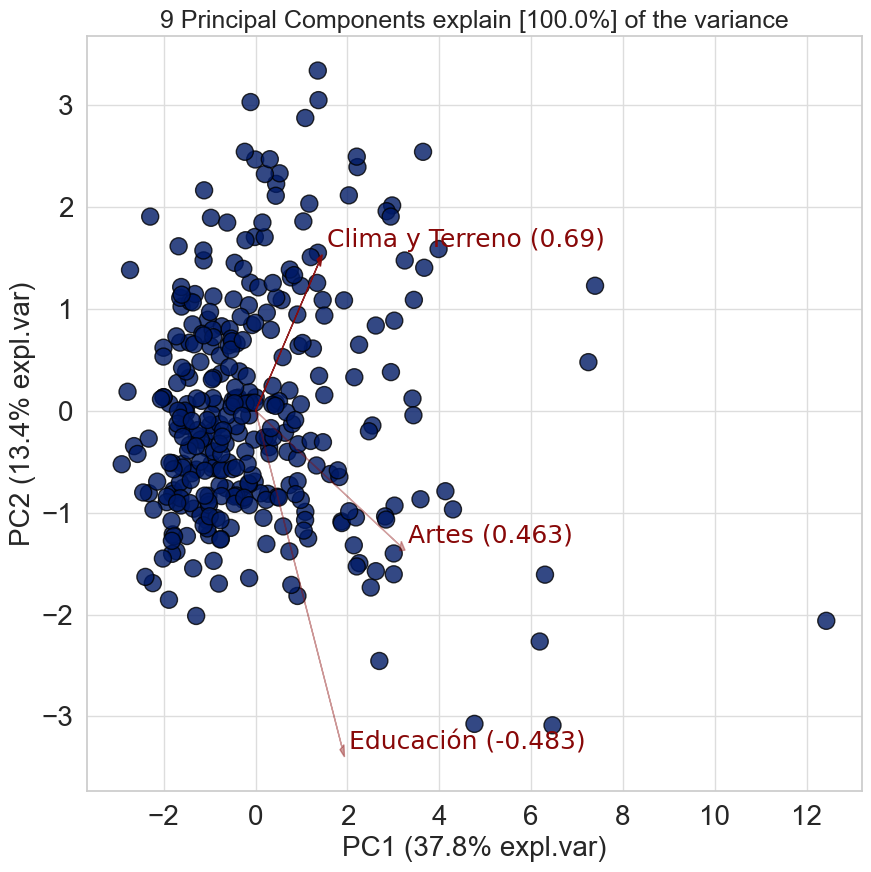

In [48]:
fig, ax = model.biplot(n_feat=3, legend=False, figsize=(10,10))

**Procedimiento**
1. Hicimos una estandarización de los datos.
2. Realizamos una descomposición espectral, esto con el fin de encontrar un producto de matrices que sea igual a la matriz inicial. A partir de este caso nos damos cuenta que "S" es una matriz de dimensión 9x9.
3. Obtenemos los eigenvalues y los eigenvectores.
4. creamos la matriz  Λ=𝑑𝑖𝑎𝑔(𝜆)
5. Reconstruimos S. De esta forma recobramos la forma original de S.
6. Iniciamos el objeto PCA.
7. Ajustamos el PCA a nuestros datos.

**Análisis**

Después de haber desarrollado esta actividad podemos ver que los resultados arrojan 9 principales componentes. El biplot analizado arroja los dos primeros componentes, el PC1 en el eje X con un 37.8% expl.var y el PC2 en el eje Y con un 13,4%. Así mismo, encontramos los loadings de las variables presentes en estos componentes, siendo estos: Educación con un -0.483, Artes con un 0.463, y Clima y Terreno con un 0.69.

**Conclusiones**
1. El primer componente principal es:
\begin{align}
f_1 =  0.20 \times \text{Clima y Terreno} + 0.35 \times Alojamiento + 0.46 \times \text{Cuidado de la salud y el medio ambiente} + 0.28 \times Crimen + 0.35 \times Transporte + 0.27 \times Educación + 0.46 \times Artes + 0.32 \times Recreación + 0.13 \times Economía
\end{align}

2. El segundo componente principal es:
\begin{align}
f_2 =  0.21 \times \text{Clima y Terreno} + 0.25 \times Alojamiento + -0.29 \times \text{Cuidado de la salud y el medio ambiente} + 0.35 \times Crimen + 0.17 \times Transporte + -0.48 \times Educación + -0.19 \times Artes + 0.38 \times Recreación + 0.47 \times Economía
\end{align}

3. El tercer componente principal es:
\begin{align}
f_3 =  0.68 \times \text{Clima y Terreno} + 0.20 \times Alojamiento + 0.07 \times \text{Cuidado de la salud y el medio ambiente} + -0.18 \times Crimen + -0.14 \times Transporte + -0.22 \times Educación + 0.02 \times Artes + 0.05 \times Recreación -0.60 \times Economía
\end{align}

4. El cuarto componente principal es:
\begin{align}
f_4 =  0.13 \times \text{Clima y Terreno} + 0.51 \times Alojamiento + 0.01 \times \text{Cuidado de la salud y el medio ambiente} + -0.53 \times Crimen + -0.30 \times Transporte + 0.33 \times Educación + -0.10 \times Artes + -0.18 \times Recreación 0.42 \times Economía
\end{align}

5. El quinto componente principal es:
\begin{align}
f_5 =  -0.36 \times \text{Clima y Terreno} + 0.23 \times Alojamiento + -0.10 \times \text{Cuidado de la salud y el medio ambiente} + -0.52 \times Crimen + 0.40 \times Transporte + -0.20 \times Educación + -0.10 \times Artes + 0.5 \times Recreación -0.15 \times Economía
\end{align}

6. El sexto componente principal es:
\begin{align}
f_6 =  -0.37 \times \text{Clima y Terreno} + 0.14 \times Alojamiento + 0.37 \times \text{Cuidado de la salud y el medio ambiente} + -0.08 \times Crimen + -0.46 \times Transporte + -0.50 \times Educación + 0.46 \times Artes + -0.08 \times Recreación -0.03 \times Economía
\end{align}


7. El septimo componente principal es:
\begin{align}
f_7 =  -0.08 \times \text{Clima y Terreno} + -0.23 \times Alojamiento + 0.01 \times \text{Cuidado de la salud y el medio ambiente} + 0.01 \times Crimen + -0.58 \times Transporte + 0.42 \times Educación + -0.02 \times Artes + -0.08 \times Recreación -0.03 \times Economía
\end{align}

8. El octavo componente principal es:
\begin{align}
f_7 =  -0.36 \times \text{Clima y Terreno} + 0.61 \times Alojamiento + -0.18 \times \text{Cuidado de la salud y el medio ambiente} + 0.43 \times Crimen + -0.58 \times Transporte + 0.42 \times Educación + -0.02 \times Artes + -0.08 \times Recreación -0.03 \times Economía
\end{align}


9. El noveno componente principal es:
\begin{align}
f_7 =  0.01 \times \text{Clima y Terreno} + 0.01 \times Alojamiento + -0.71 \times \text{Cuidado de la salud y el medio ambiente} + -0.05 \times Crimen + -0.58 \times Transporte + 0.42 \times Educación + -0.02 \times Artes + -0.08 \times Recreación -0.03 \times Economía
\end{align}

In [49]:
# Utilice este espacio para escribir el código.
prop_var_explicada = eig_val/sum(eig_val)
prop_var_explicada

array([0.37869909, 0.13488624, 0.12683102, 0.1023242 , 0.08369832,
       0.07006243, 0.05478308, 0.03533761, 0.01337801])

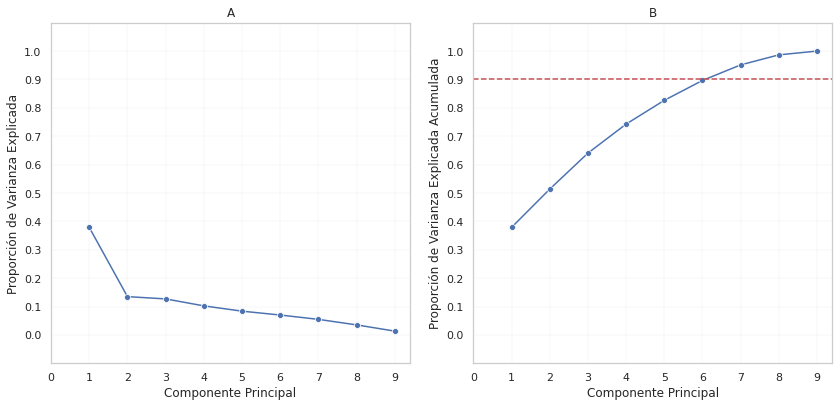

In [50]:
explained_variance = np.cumsum(eig_val) / np.sum(eig_val)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=np.arange(1, len(prop_var_explicada) + 1), y=prop_var_explicada, marker='o')

plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('A')
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.ylim(-0.1, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 10, 1))

plt.subplot(1, 2, 2)

sns.lineplot(x=np.arange(1, len(explained_variance) + 1), y=explained_variance, marker='o')

plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.title('B')
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.axhline(y=0.9, color='r', linestyle='--', label='Umbral')
plt.ylim(-0.1, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 10, 1))


plt.tight_layout()

plt.show()

**Procedimiento**

**Análisis**

**Conclusiones**

### 4.  Interpretación de los componentes principales.

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, los pesos obtenidos pueden identificar dimensiones menores de los datos? Dé una interpretación a estas dimensiones, para ello puede utilizar gráficas, tablas, etc.

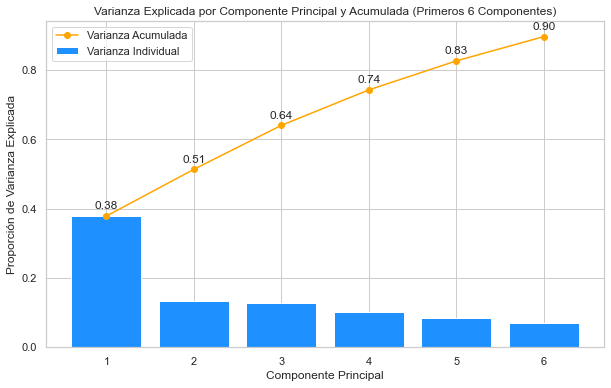

In [51]:
# Utilice este espacio para escribir el código.
# Se crea un modelo nuevo con las dimensiones reducidas lo 6 PCA 
model_red = pca(n_components=6)
df_pca_red = model_red.fit_transform(df_norm, verbose=False)

# Se calcula la proporción de varianza explicada por cada componente
explained_variance_ratio = eig_val / np.sum(eig_val)

# Calcular la varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Se un gráfico de barras y línea para mostrar la varianza explicada acumulada
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.bar(range(1, 7), explained_variance_ratio[:6], color='dodgerblue', label='Varianza Individual')
plt.plot(range(1, 7), cumulative_explained_variance[:6], color='orange', marker='o', label='Varianza Acumulada')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal y Acumulada (Primeros 6 Componentes)')
plt.xticks(range(1, 7))

for i, cum_var in enumerate(cumulative_explained_variance[:6]):
    plt.text(i + 1, cum_var + 0.02, f'{cum_var:.2f}', ha='center')

plt.legend()
plt.show()

In [52]:
pesos_df = df_pca_red["loadings"]

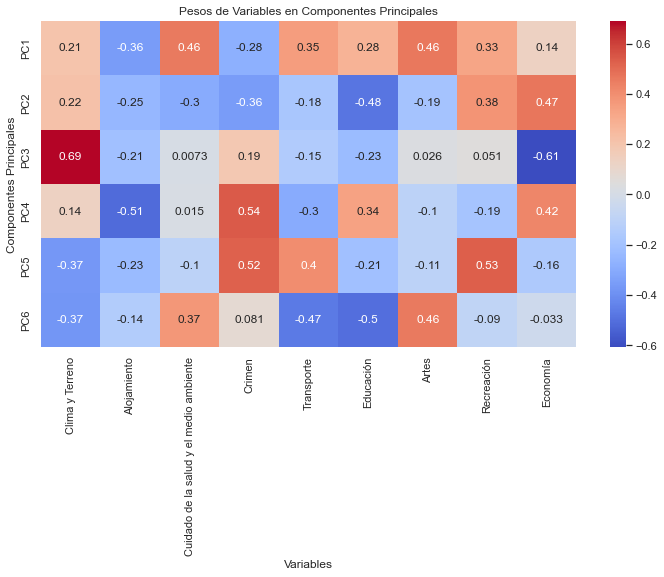

In [53]:
# Realizar gráficos de barras para mostrar los pesos de las variables en cada componente
plt.figure(figsize=(12, 6))
sns.heatmap(pesos_df, annot=True, cmap='coolwarm')
plt.title('Pesos de Variables en Componentes Principales')
plt.xlabel('Variables')
plt.ylabel('Componentes Principales')
plt.show()

Para responder la pregunta del punto 4:

**Logró reducir la dimensión en el ejercicio anterior?**

Sí, se logro reducir la dimensión de los datos en el ejercicio anterior utilizando el PCA. Comos se puede observar de los 9 Componentes Principales posibles se procede a seleccionar 6 que explican una varianza acumulada del 90%. (Ver Gráfica `Varianza Explicada por Componente Principal y Acumulada (Primeros 6 Componentes)`)

**Los pesos obtenidos pueden identificar dimensiones menores de los datos?**

Sí, los pesos obtenidos en el PCA son coeficientes que indican cómo cada variable original contribuye a cada componente principal. Estos pesos permiten identificar las dimensiones menores en los datos originales. A través de estos componentes principales se pueden observar patrones de variabilidad en los datos identificando estructuras subyacentes y relaciones entre las variables.

**Interpretación de las Dimensiones**

Para interpretar estas dimensiones y sus pesos asociados, se procedio a usar un heatmap con base en los *loadings* obtenidos. Con base en esta gráfica (Ver Gráfica `Pesos de Variables en Componentes Principales`) se puede observar que:

1. Para el Componente Principal 1 las variables `Cuidado de la salud y el medio ambiente` y `Pesos de Variables en Componentes Principales` y `Artes` son las que más peso brindan y por lo tanto las que más afectan su valor.
2. Para el Componente Principal 2 la variable `Economía` es la que más peso tiene sobre la misma.
3. Para el Componente Principal 3 se pueden observar dos efectos contrarios con gran peso. La variable `Clima y Terreno` parece tener una gran efecto positivo sobre este componente, al contrario la variable `Economía` parece tener un efecto inverso sobre el valor de este componente.
4. Para el Componente Principal 4 la variable `Crimen` presenta un efecto fuerte inverso sobre la misma.
5. Para el Componente Principal 5 la variable `Recreación` parece ser la que más peso presenta sobre su valor. 
6. Para el Componente Principal 6 La variable `Transporte` revela un efecto destacado, con una relación inversa. Esto implica que un aumento en los valores se etsa se asocia con una disminución en los valores de este componente.

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [24]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).